In [284]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
sns.set()
warnings.filterwarnings('ignore')

In [285]:
x = pd.read_csv("Cleaning data.csv")


In [286]:
x.shape

(20467, 45)

In [287]:
x


,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,ISR,NLD,RUS,SGP,SWE,USA,other.1,isClosed,Age_in_Days,Age_in_Days.1
0,operating,2005.0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,...,False,False,False,False,False,True,False,1.0,6935.0,6935.0
1,acquired,2007.0,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
2,operating,2007.0,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,False,True,False,1.0,6205.0,6205.0
3,operating,2003.0,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,...,False,False,False,False,False,True,False,1.0,7665.0,7665.0
4,operating,2006.0,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,...,False,False,False,False,False,True,False,1.0,6570.0,6570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20462,closed,2008.0,9.010471,2008.0,2008.0,1.0,130000.0,2008.000000,2009.000000,2.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
20463,operating,2011.0,9.010471,2011.0,2011.0,1.0,500000.0,2011.000000,2011.000000,1.000000,...,False,False,False,False,False,False,False,1.0,4745.0,4745.0
20464,closed,2006.0,9.010471,2008.0,2009.0,2.0,1100000.0,2005.000000,2008.000000,2.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
20465,operating,2007.0,9.010471,2008.0,2008.0,1.0,750000.0,2013.000000,2013.000000,1.000000,...,False,False,False,False,False,True,False,1.0,6205.0,6205.0


In [288]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20467 entries, 0 to 20466
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              20467 non-null  object 
 1   founded_at          20467 non-null  float64
 2   investment_rounds   20467 non-null  float64
 3   first_funding_at    20467 non-null  float64
 4   last_funding_at     20467 non-null  float64
 5   funding_rounds      20467 non-null  float64
 6   funding_total_usd   20467 non-null  float64
 7   first_milestone_at  20467 non-null  float64
 8   last_milestone_at   20467 non-null  float64
 9   milestones          20467 non-null  float64
 10  relationships       20467 non-null  float64
 11  lat                 20467 non-null  float64
 12  lng                 20467 non-null  float64
 13  analytics           20467 non-null  bool   
 14  biotech             20467 non-null  bool   
 15  cleantech           20467 non-null  bool   
 16  ecom

In [289]:
columns_target = x.select_dtypes(['float64','object'])
columns_target.columns

Index(['status', 'founded_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng', 'isClosed', 'Age_in_Days',
       'Age_in_Days.1'],
      dtype='object')

In [290]:
#Making Independent Features
train_features = columns_target.columns.tolist()
del train_features[13]
train_features

['status',
 'founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days',
 'Age_in_Days.1']

In [291]:
#Eliminating 'status' as it relates to 'isClosed'
del train_features[0]
train_features

['founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days',
 'Age_in_Days.1']

In [292]:
#Eliminating 'Age_in_Days.1' as it is just the replication of 'Age_in_Days'
del train_features[13]
train_features

['founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days']

In [293]:
#Eliminating 'founded_at' as it relates to 'Age_in_Days'
del train_features[0]
train_features

['investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days']

In [294]:
a = x[train_features]
b = x['isClosed']

In [295]:
#Over Sampling minority class using Synthetic Minority Oversampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
a , b = smote.fit_resample(a,b)

In [296]:
b.value_counts()


1.0    17553
0.0    17553
Name: isClosed, dtype: int64

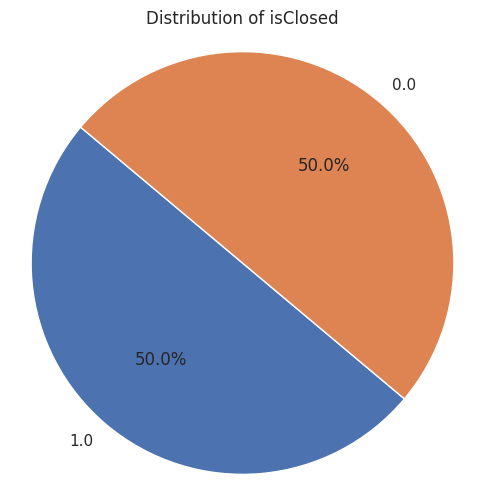

In [297]:
closed_counts = b.value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(closed_counts, labels=closed_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of isClosed')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [298]:
a.head(20)

,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,Age_in_Days
0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,17.00000,47.606209,-122.332071,6935.0
1,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,14.00000,37.386052,-122.083851,0.0
2,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,14.00000,37.774929,-122.419415,6205.0
3,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,6.00000,30.267153,-97.743061,7665.0
4,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,19.00000,37.774929,-122.419415,6570.0
5,9.010471,2003.0,2003.0,1.0,250000.0,2007.000000,2007.000000,1.000000,2.00000,-27.469771,153.025124,7665.0
6,9.010471,2011.0,2011.0,1.0,100000.0,2010.000000,2010.000000,1.000000,6.14057,38.559376,-67.025344,5110.0
7,9.010471,2011.0,2012.0,2.0,11300000.0,2010.164879,2011.046642,1.703825,2.00000,42.018989,-71.007822,6570.0
8,9.010471,2007.0,2007.0,2.0,414840.0,2010.164879,2011.046642,1.703825,2.00000,48.856614,2.352222,6570.0
9,9.010471,2011.0,2011.0,1.0,1500000.0,2010.000000,2010.000000,1.000000,8.00000,47.610150,-122.201516,7300.0


In [299]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
a_train_scaled = scaler.fit_transform(a_train)
a_test_scaled = scaler.transform(a_test)

# Create the LightGBM dataset
train_data = lgb.Dataset(a_train_scaled, label=b_train)
test_data = lgb.Dataset(a_test_scaled, label=b_test, reference=train_data)


# Set parameters for the model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'early_stopping_round': 10
}

In [300]:
num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Info] Number of positive: 14042, number of negative: 14042
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2626
[LightGBM] [Info] Number of data points in the train set: 28084, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [301]:
# Make predictions on the test set
b_pred = bst.predict(a_test_scaled, num_iteration=bst.best_iteration)

#This converts the probabilities predicted by the model into binary predictions.
#This is necessary because the output of a binary classification model like LightGBM is typically probabilities indicating the likelihood of each class.
b_pred_binary = [1 if x > 0.5 else 0 for x in b_pred]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


# Compute accuracy
accuracy = accuracy_score(b_test, b_pred_binary)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(b_test, b_pred_binary)
print("Precision:", precision)

# Compute recall
recall = recall_score(b_test, b_pred_binary)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(b_test, b_pred_binary)
print("F1-score:", f1)

# Compute AUC-ROC score
auc_roc = roc_auc_score(b_test, b_pred)
print("AUC-ROC score:", auc_roc)



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC score: 1.0


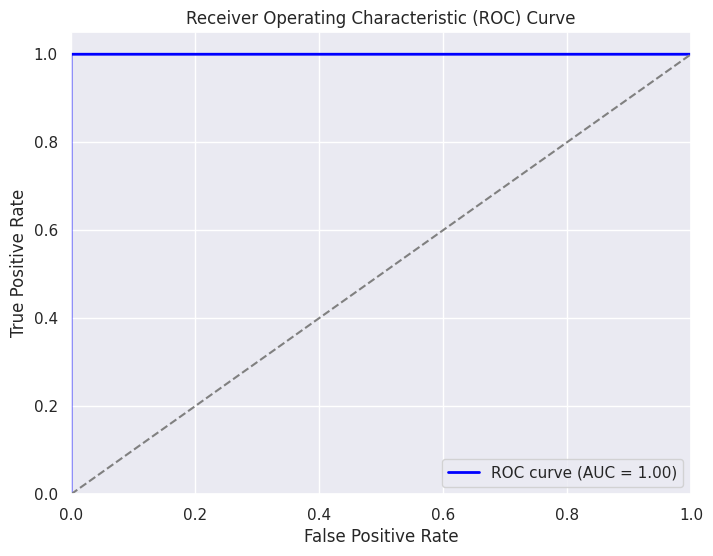

In [302]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(b_test, b_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [303]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'feature_fraction': [0.6, 0.8, 1.0]
}


In [304]:
# Initialize the LightGBM classifier
lgb_clf = lgb.LGBMClassifier(objective='binary', metric='binary_error')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(a_train_scaled, b_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Info] Number of positive: 14042, number of negative: 14042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2626
[LightGBM] [Info] Number of data points in the train set: 28084, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=3,
             estimator=LGBMClassifier(metric='binary_error',
                                      objective='binary'),
             n_jobs=-1,
             param_grid={'feature_fraction': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'num_leaves': [20, 31, 40]},
             scoring='accuracy', verbose=1)

In [305]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'feature_fraction': 0.6, 'learning_rate': 0.01, 'num_leaves': 20}


In [306]:
# Train the model with the best parameters
best_model = lgb.LGBMClassifier(objective='binary', metric='binary_error', **best_params)
best_model.fit(a_train_scaled, b_train)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Info] Number of positive: 14042, number of negative: 14042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2626
[LightGBM] [Info] Number of data points in the train set: 28084, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(feature_fraction=0.6, learning_rate=0.01, metric='binary_error',
               num_leaves=20, objective='binary')

In [307]:
# Make predictions on the test set
b_pred = best_model.predict(a_test_scaled)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6


In [308]:
# Evaluate the model
accuracy = accuracy_score(b_test, b_pred)
print("Accuracy after hyperparameter tuning:", accuracy)

# Compute precision
precision = precision_score(b_test, b_pred)
print("Precision after hyperparameter tuning:", precision)

# Compute recall
recall = recall_score(b_test, b_pred)
print("Recall after hyperparameter tuning:", recall)

# Compute F1-score
f1 = f1_score(b_test, b_pred)
print("F1-score after hyperparameter tuning:", f1)

# Compute AUC-ROC score
b_pred_proba = best_model.predict_proba(a_test_scaled)[:, 1]  # Probability of positive class
auc_roc = roc_auc_score(b_test, b_pred_proba)
print("AUC-ROC score after hyperparameter tuning:", auc_roc)

from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(b_test, b_pred_binary))

Accuracy after hyperparameter tuning: 1.0
Precision after hyperparameter tuning: 1.0
Recall after hyperparameter tuning: 1.0
F1-score after hyperparameter tuning: 1.0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
AUC-ROC score after hyperparameter tuning: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3511
         1.0       1.00      1.00      1.00      3511

    accuracy                           1.00      7022
   macro avg       1.00      1.00      1.00      7022
weighted avg       1.00      1.00      1.00      7022



In [309]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function plots the confusion matrix.

    Parameters:
        cm (array-like): Confusion matrix.
        classes (list): List of class labels.
        normalize (bool): Whether to normalize the confusion matrix or not.
        title (str): Title of the plot.
        cmap (matplotlib.colors.Colormap): Colormap used for visualization.
    """
    # Plotting the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(range(cm.shape[0]))
    plt.yticks(range(cm.shape[1]))

    # Normalizing the confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
    else:
        cm = cm

    # Setting threshold for text color
    thresh = cm.max() / 2.

    # Adding text annotations to the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Formatting the plot
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix:


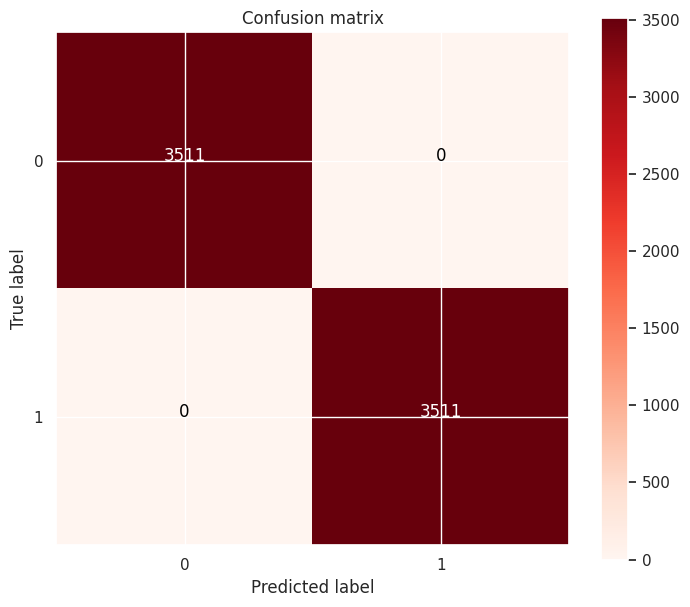

In [310]:
from sklearn.metrics import confusion_matrix
# Plotting confusion matrix
print("Confusion Matrix:")
conf_mat = confusion_matrix(b_test, b_pred)
np.set_printoptions(precision=2)
fig1 = plt.figure(figsize=(7, 6))
plot_confusion_matrix(conf_mat, classes=np.unique(b_train), title='Confusion matrix')